# Basic Tensorflow and Keras 

- https://www.tensorflow.org/api_docs/python/tf

## Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = tf.add(3,5)
print(a)

tf.Tensor(8, shape=(), dtype=int32)


In [4]:
a = tf.add(3.,5)
print(a)

tf.Tensor(8.0, shape=(), dtype=float32)


In [5]:
a = tf.add(3,5)
print(a)
b = tf.cast(a,tf.int16)
print(b)
c = tf.cast(a,tf.float32)
print(c)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int16)
tf.Tensor(8.0, shape=(), dtype=float32)


In [6]:
print(tf.add(3,4))
print(tf.subtract(3,4))
print(tf.multiply(3,4))

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)


In [7]:
print(tf.add([3,4],[4,5]))
print(tf.subtract([3,4],[4,5]))
print(tf.multiply([3,4],[4,5]))

tf.Tensor([7 9], shape=(2,), dtype=int32)
tf.Tensor([-1 -1], shape=(2,), dtype=int32)
tf.Tensor([12 20], shape=(2,), dtype=int32)


In [8]:
print(tf.add([[3,4]],[[4,5]]))
print(tf.subtract([[3,4]],[[4,5]]))
print(tf.multiply([[3,4]],[[4,5]]))

tf.Tensor([[7 9]], shape=(1, 2), dtype=int32)
tf.Tensor([[-1 -1]], shape=(1, 2), dtype=int32)
tf.Tensor([[12 20]], shape=(1, 2), dtype=int32)


In [9]:
x1 = tf.Variable(3)
x2 = tf.Variable(5)
k = tf.constant(2)
a = tf.multiply(x1,x2)
out = tf.add(a,k)
print(x1,x2,k,a,out)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3> <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5> tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)


## Practicals

In [10]:
# Example 1
a = tf.constant(2.0)
b = tf.constant(-3.0)
c = tf.constant(-1.0)
root1 = tf.add(-b , tf.sqrt(b*b - 4*a*c))/(2*a)
root2 = tf.add(-b , -tf.sqrt(b*b - 4*a*c))/(2*a)
print(root1, root2)

tf.Tensor(1.7807764, shape=(), dtype=float32) tf.Tensor(-0.28077638, shape=(), dtype=float32)


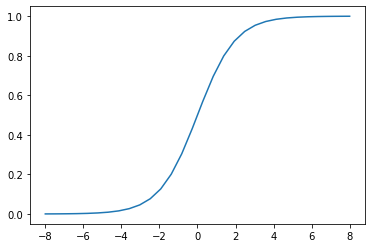

In [11]:
# Example 2

def mysigmoid(x):
    return 1.0/(1+tf.exp(-x))

x = tf.linspace(-8.,8.,30)
y = mysigmoid(x)
plt.plot(x,y)

In [12]:
a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
out = tf.keras.activations.sigmoid(a)
out.numpy()

array([2.0611537e-09, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       1.0000000e+00], dtype=float32)

In [13]:
W = tf.Variable([[3.],[-2.],[1.]])
X = tf.Variable([[1.,2.,1.]])
print(tf.matmul(X,W))
print(tf.keras.activations.sigmoid(tf.matmul(X,W)))

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.5]], shape=(1, 1), dtype=float32)


## Keras

### Sequential model, and Layers

In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 136       
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [39]:
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(8, input_shape=(2,)))
model.add(tf.keras.layers.Dense(1))

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [41]:
a = np.array([[-10,0],[10,10]])
print(a.shape)
z = model.predict(a)
z

(2, 2)


array([[ 3.01316  ],
       [-7.3136415]], dtype=float32)

In [42]:
tf.nn.tanh(z)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.99518305],
       [-0.9999991 ]], dtype=float32)>

In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [44]:
model(a).numpy()

array([[ 0.99449027],
       [-0.9999158 ]], dtype=float32)

### Loss functions

In [45]:
model.compile(optimizer='sgd', loss='mse')

In [46]:
x = [[1,0],[1,1],[0,1],[0,0]]
#x = [[1,1]]
model.predict(x)

array([[-0.2863465 ],
       [-0.46503788],
       [-0.20614155],
       [ 0.        ]], dtype=float32)

In [47]:
y_true = [[0.], [1.], [0.], [0.]]
y_pred = [[0.6], [0.4], [0.4], [0.6]]
tf.keras.losses.mean_squared_error(y_true, y_pred)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.36      , 0.36      , 0.16000001, 0.36      ], dtype=float32)>

In [48]:
tf.keras.losses.mean_squared_error([1,0,1], [0.5,0.2,0.7])

<tf.Tensor: shape=(), dtype=float32, numpy=0.12666667>

In [49]:
tf.keras.activations.softmax(tf.constant([[0.02,2.7,0.01]]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.0603313, 0.8799377, 0.059731 ]], dtype=float32)>

In [50]:
tf.reduce_mean([1,2,3,4,5,6,7,8,9,10])

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [51]:
tf.reduce_mean(np.array([1,2,3,4,5,6,7,8,9,10]))

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [52]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

0.81492424

In [53]:
bceloss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
bceloss.numpy()

array([0.9162905 , 0.71355796], dtype=float32)

In [54]:
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

0.45814535

In [55]:
cceloss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
cceloss.numpy()

array([ 0.9162907, -0.       ], dtype=float32)

In [56]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()

0.31

In [57]:
mseloss = tf.keras.losses.mean_squared_error(y_true, y_pred)
mseloss.numpy()

array([0.36      , 0.26000002], dtype=float32)

In [58]:
h = tf.keras.losses.Hinge()
h(y_true, y_pred).numpy()

1.3

In [59]:
hloss = tf.keras.losses.hinge(y_true, y_pred)
hloss.numpy()

array([1.1, 1.5], dtype=float32)

## Practicals

### Example 2 Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# prepare data
X = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,0,0,0])

# create model
# keras.layers.Dense(units, activation=None, use_bias=True, 
#                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#                    kernel_regularizer=None, bias_regularizer=None, 
#                    activity_regularizer=None, kernel_constraint=None, 
#                    bias_constraint=None)
model = Sequential()
model.add(Dense(1, activation='sigmoid',input_shape=(2,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
op = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.0)
model.compile(loss='mse', optimizer=op, metrics=['accuracy'])
# train model
history = model.fit(X, y, epochs=500, batch_size=len(X), verbose=2)


Epoch 1/500
1/1 - 0s - loss: 0.2878 - accuracy: 0.5000
Epoch 2/500
1/1 - 0s - loss: 0.2804 - accuracy: 0.5000
Epoch 3/500
1/1 - 0s - loss: 0.2732 - accuracy: 0.5000
Epoch 4/500
1/1 - 0s - loss: 0.2663 - accuracy: 0.5000
Epoch 5/500
1/1 - 0s - loss: 0.2598 - accuracy: 0.7500
Epoch 6/500
1/1 - 0s - loss: 0.2535 - accuracy: 0.7500
Epoch 7/500
1/1 - 0s - loss: 0.2476 - accuracy: 0.7500
Epoch 8/500
1/1 - 0s - loss: 0.2420 - accuracy: 0.7500
Epoch 9/500
1/1 - 0s - loss: 0.2366 - accuracy: 0.7500
Epoch 10/500
1/1 - 0s - loss: 0.2316 - accuracy: 0.7500
Epoch 11/500
1/1 - 0s - loss: 0.2268 - accuracy: 0.7500
Epoch 12/500
1/1 - 0s - loss: 0.2223 - accuracy: 0.7500
Epoch 13/500
1/1 - 0s - loss: 0.2181 - accuracy: 0.7500
Epoch 14/500
1/1 - 0s - loss: 0.2141 - accuracy: 0.7500
Epoch 15/500
1/1 - 0s - loss: 0.2104 - accuracy: 0.7500
Epoch 16/500
1/1 - 0s - loss: 0.2069 - accuracy: 0.7500
Epoch 17/500
1/1 - 0s - loss: 0.2036 - accuracy: 0.7500
Epoch 18/500
1/1 - 0s - loss: 0.2004 - accuracy: 0.7500
E

In [ ]:
history.history

{'accuracy': [0.5,
  0.5,
  0.5,
  0.5,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  

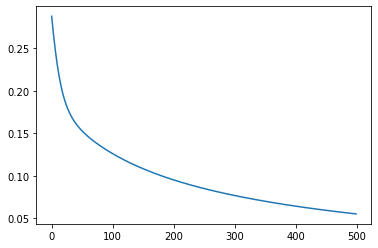

In [ ]:
plt.plot(history.history['loss'])

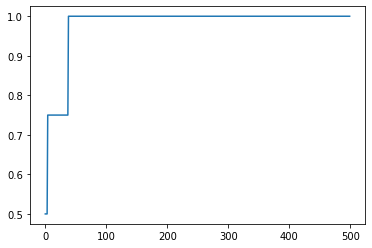

In [ ]:
plt.plot(history.history['accuracy'])

### Example 3 Multi-layer Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# prepare data
X = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,0,0,1])

# create model
# keras.layers.Dense(units, activation=None, use_bias=True, 
#                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#                    kernel_regularizer=None, bias_regularizer=None, 
#                    activity_regularizer=None, kernel_constraint=None, 
#                    bias_constraint=None)
model = Sequential()
model.add(Dense(3, activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
op = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.0)
# compile model
model.compile(loss='mse', optimizer=op, metrics=['accuracy'])
# train model
history = model.fit(X, y, epochs=1000, batch_size=len(X), verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 2/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 3/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 4/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 5/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 6/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 7/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 8/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 9/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 10/1000
1/1 - 0s - loss: 0.2507 - accuracy: 0.5000
Epoch 11/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 12/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 13/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 14/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 15/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 16/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 17/1000
1/1 - 0s - loss: 0.2506 - accuracy: 0.5000
Epoch 18/1000
1/1 - 0s - loss: 0.2506 - 

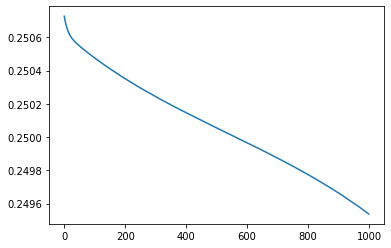

In [ ]:
plt.plot(history.history['loss'])

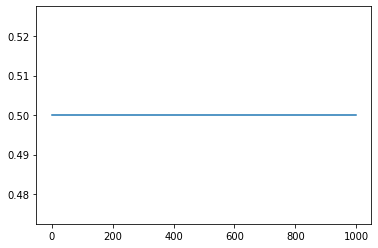

In [ ]:
plt.plot(history.history['accuracy'])

#### MLP with One Hot Encoding Output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Prepare Iris data
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

iris = datasets.load_iris()
X = iris.data
y = iris.target
#
ohenc = OneHotEncoder(sparse=False)
yoh = ohenc.fit_transform(np.reshape(y,[150,1]))
print(X.shape,y.shape,yoh.shape)

(150, 4) (150,) (150, 3)


In [ ]:

# create model
# keras.layers.Dense(units, activation=None, use_bias=True, 
#                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#                    kernel_regularizer=None, bias_regularizer=None, 
#                    activity_regularizer=None, kernel_constraint=None, 
#                    bias_constraint=None)
model = Sequential()
model.add(Dense(6, activation='sigmoid',input_dim=4))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 21        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
op = tf.keras.optimizers.Adam( learning_rate=0.1 )
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(X, yoh, epochs=1000, batch_size=len(X), verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 1.0913 - accuracy: 0.3333
Epoch 2/1000
1/1 - 0s - loss: 1.0895 - accuracy: 0.3333
Epoch 3/1000
1/1 - 0s - loss: 1.0877 - accuracy: 0.3333
Epoch 4/1000
1/1 - 0s - loss: 1.0860 - accuracy: 0.3333
Epoch 5/1000
1/1 - 0s - loss: 1.0842 - accuracy: 0.3333
Epoch 6/1000
1/1 - 0s - loss: 1.0824 - accuracy: 0.3333
Epoch 7/1000
1/1 - 0s - loss: 1.0807 - accuracy: 0.3333
Epoch 8/1000
1/1 - 0s - loss: 1.0790 - accuracy: 0.3333
Epoch 9/1000
1/1 - 0s - loss: 1.0773 - accuracy: 0.3333
Epoch 10/1000
1/1 - 0s - loss: 1.0755 - accuracy: 0.3333
Epoch 11/1000
1/1 - 0s - loss: 1.0738 - accuracy: 0.3333
Epoch 12/1000
1/1 - 0s - loss: 1.0722 - accuracy: 0.3333
Epoch 13/1000
1/1 - 0s - loss: 1.0705 - accuracy: 0.3333
Epoch 14/1000
1/1 - 0s - loss: 1.0688 - accuracy: 0.3333
Epoch 15/1000
1/1 - 0s - loss: 1.0671 - accuracy: 0.3333
Epoch 16/1000
1/1 - 0s - loss: 1.0655 - accuracy: 0.3333
Epoch 17/1000
1/1 - 0s - loss: 1.0638 - accuracy: 0.3333
Epoch 18/1000
1/1 - 0s - loss: 1.0622 - 

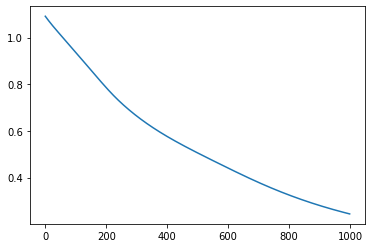

In [ ]:
plt.plot(history.history['loss'])

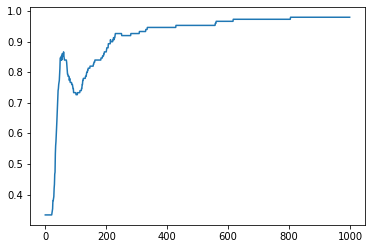

In [ ]:
plt.plot(history.history['accuracy'])